# Importing the libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
import pickle

# Data loading and understanding

In [9]:
#load csv data as pandas dataframe
df=pd.read_csv(r"C:\Users\btn9n\Downloads\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
pd.set_option("display.max_columns", None)
#setting max columns to be visible

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#no missing values
#total charges should be float
#customer id can be dropped
#senior citizen is a categorical column

In [16]:
df=df.drop(columns='customerID')

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#printing the unique values in all columns
for col in df.columns:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [19]:
numerical_features=['tenure','MonthlyCharges','TotalCharges']

In [20]:
for col in df.columns:
    if col not in numerical_features:
        print(col, df[col].unique())
        print("-"*50)
#finding only categorical values

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [21]:
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [22]:
#space is used for missing values rather than NAN which can not be converted to float

len(df[df['TotalCharges']==' '])

11

In [23]:
#there are 11 rows and they have tenure as 0. hence monthly charges are joining charges
#so we can change it to 0 but string as others are in string in the same column
df['TotalCharges']=df['TotalCharges'].replace({' ':'0.0'})

In [24]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
#checking the distribution of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [27]:
#so there is imbalance in the dataset as one category dominates

# EDA

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


numerical features analysis

In [30]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f'Distribution of {column_name}')
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    #add vertical lines for mean and median
    plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(col_median, color='green', linestyle='--', label='Median')
    plt.legend()
    plt.show()

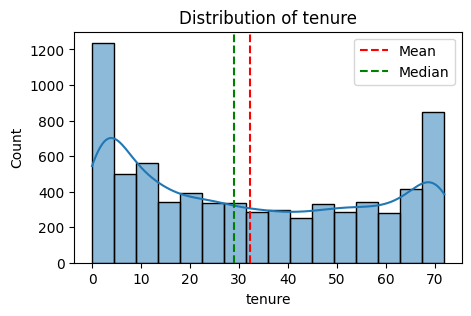

In [31]:
plot_histogram(df, 'tenure')

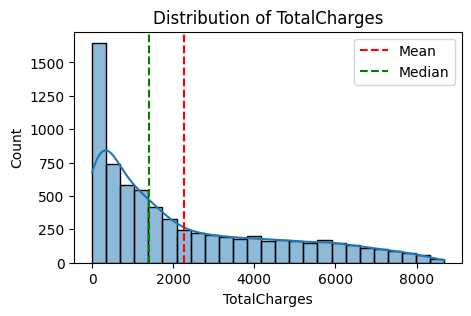

In [32]:
plot_histogram(df, 'TotalCharges')

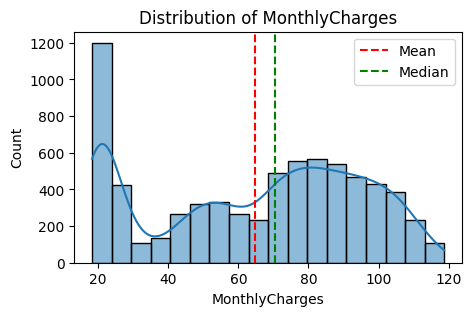

In [33]:
plot_histogram(df, 'MonthlyCharges')

In [34]:
#not normal distributions


Box plot for numerical features

In [35]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df['Churn'],y=df[column_name])
    plt.title(f'Distribution of {column_name}')
    plt.ylabel(column_name)
    plt.show()

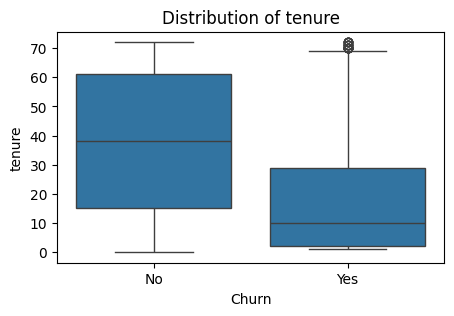

In [36]:
plot_boxplot(df, 'tenure')

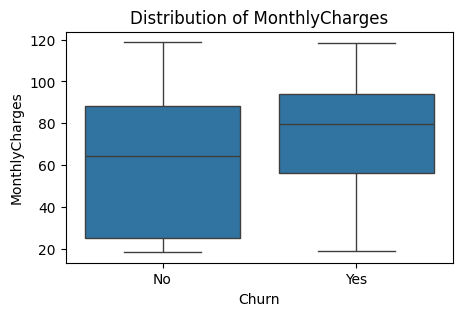

In [37]:
plot_boxplot(df, 'MonthlyCharges')

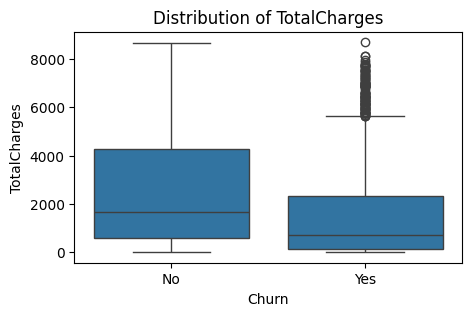

In [38]:
plot_boxplot(df, 'TotalCharges')

Understanding Heatmap for numerical columns

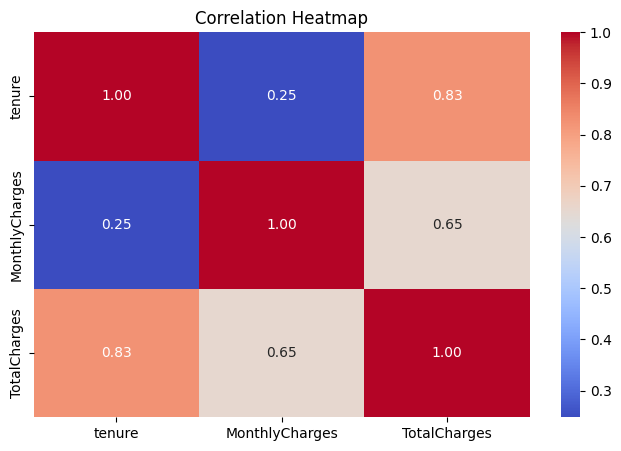

In [39]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
#total charges and tenure are highly correlated which makes sense. If required, one of these can be dropped later to avoid correlation problems

Categorial features analysis

In [41]:
object_cols=df.select_dtypes(include='object').columns.to_list()
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [42]:
#churn is added and seniorcitizens is missing

In [43]:
object_cols=['SeniorCitizen']+object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

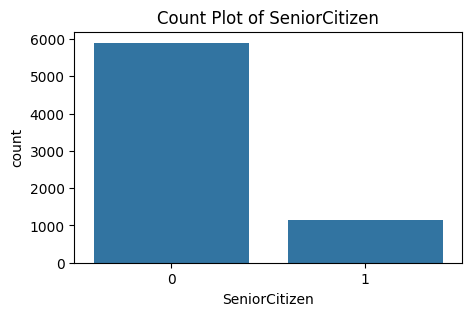

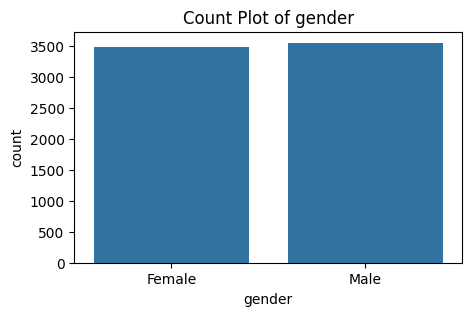

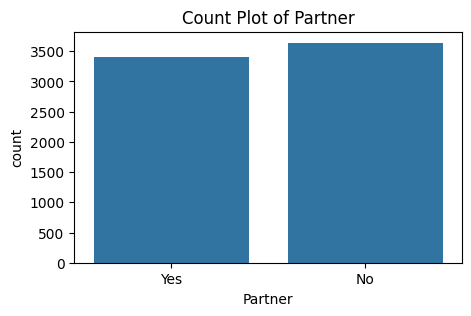

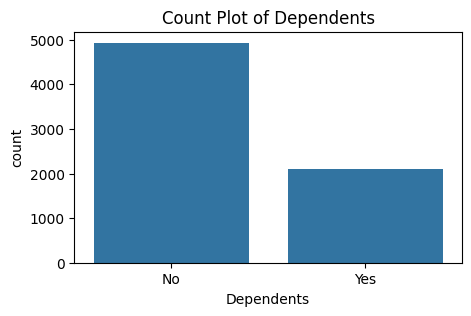

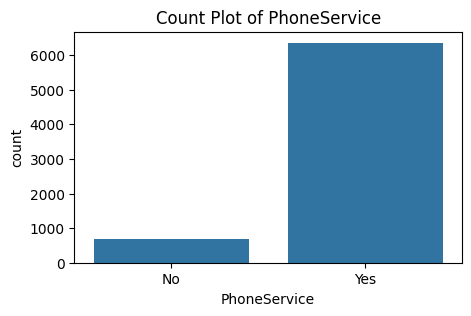

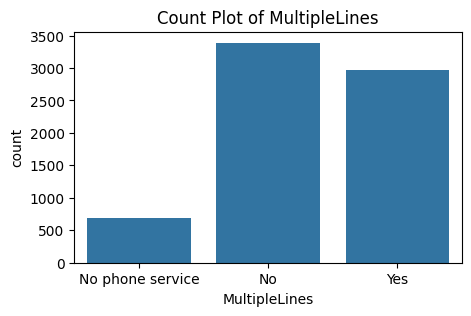

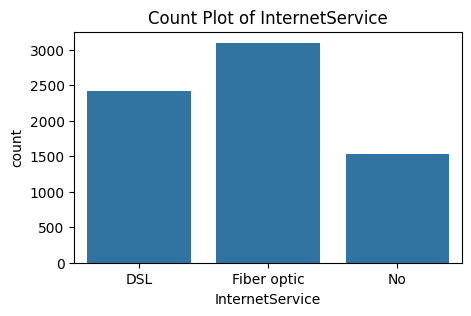

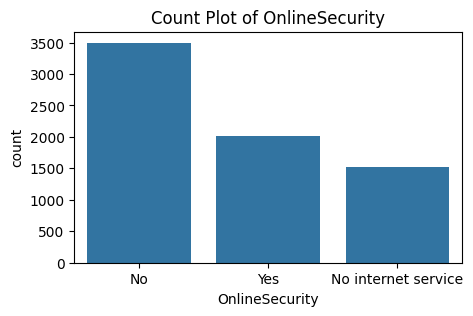

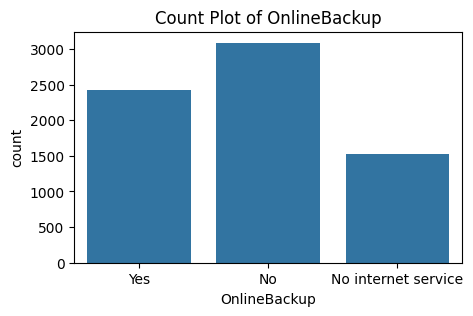

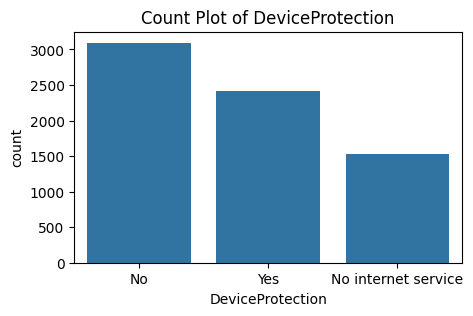

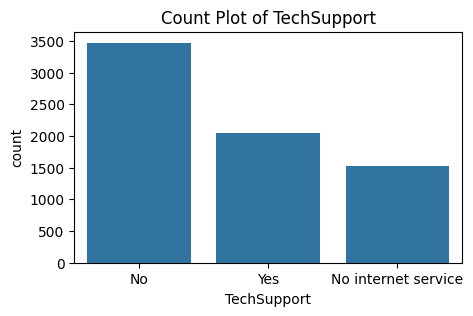

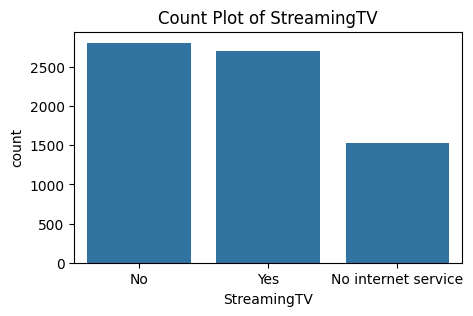

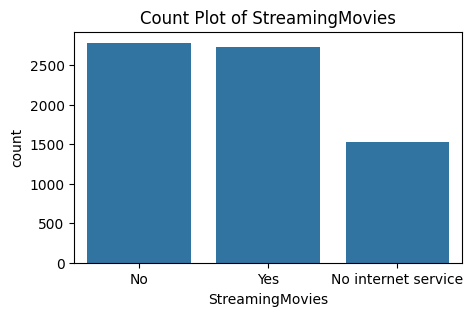

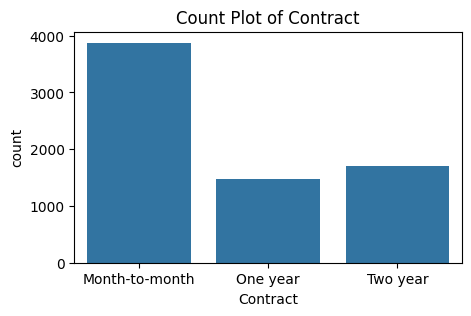

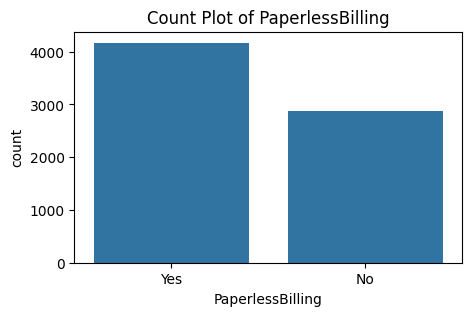

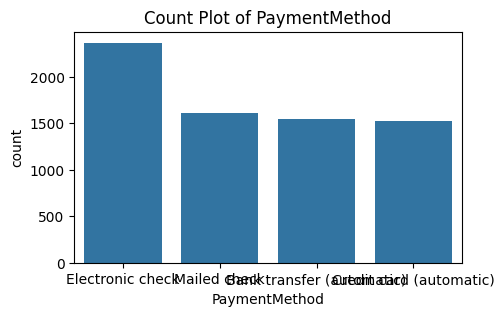

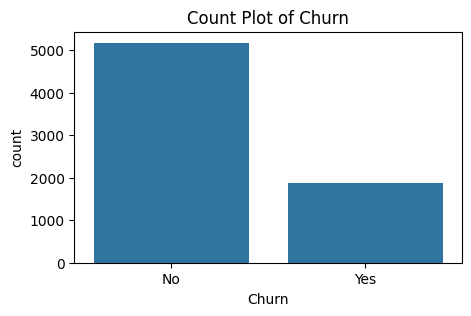

In [44]:
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

# Data Preprocessing

In [45]:
#using labelencoder for columns

In [46]:
#label encoding of target column
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})

C:\Users\btn9n\AppData\Local\Temp\ipykernel_8024\2898838679.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({'Yes':1,'No':0})


In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [48]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [49]:
#label encoding of categorical features
#whereever the type is object we need to convert them into numbers
object_columns=df.select_dtypes(include='object').columns.to_list()
#will not hv seniorcitizens or churn

In [50]:
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

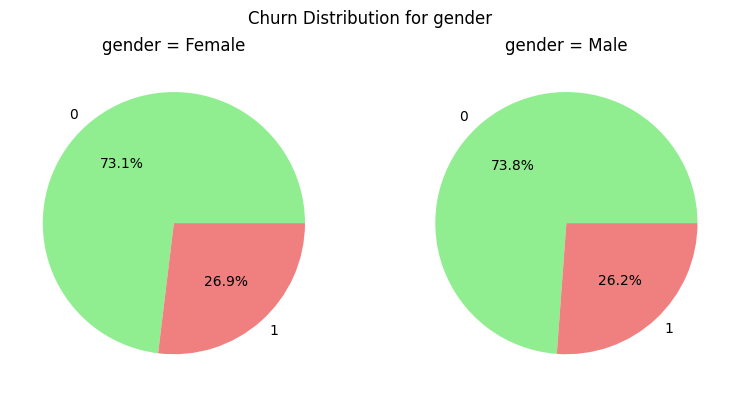

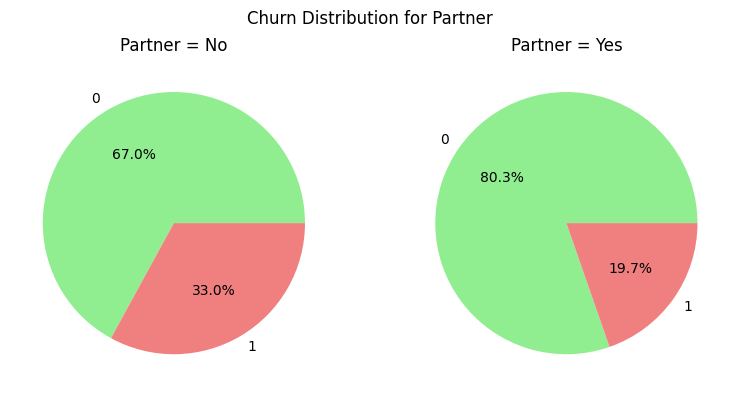

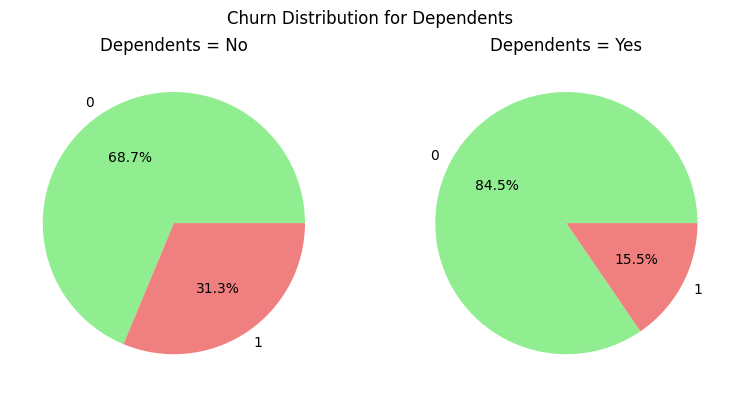

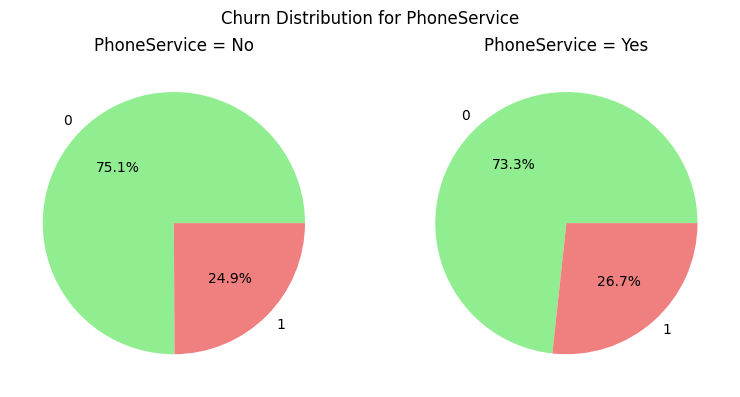

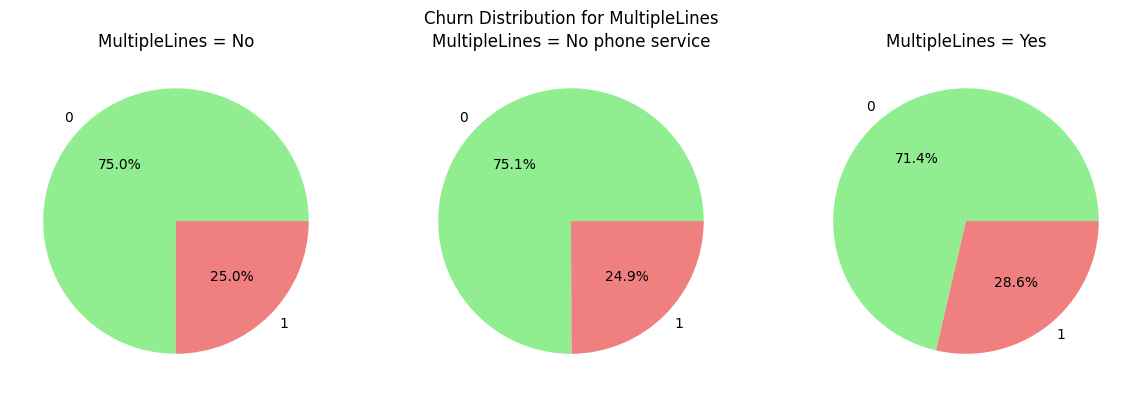

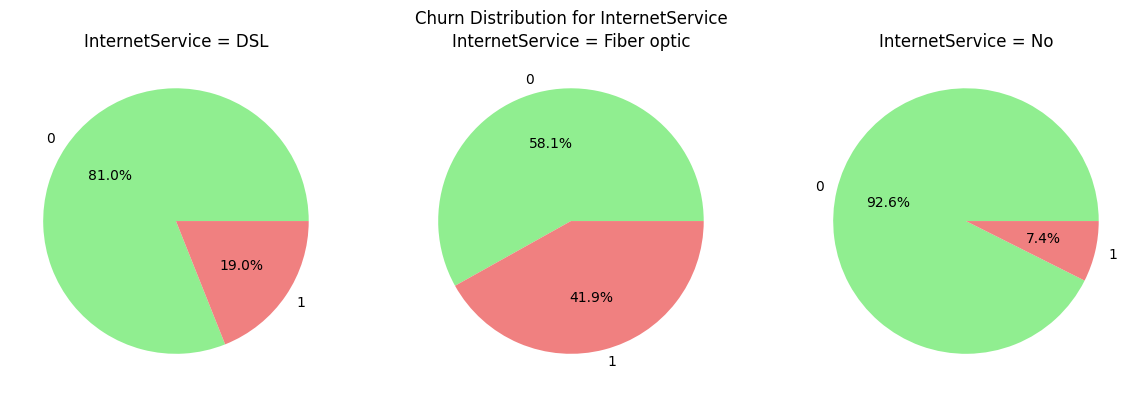

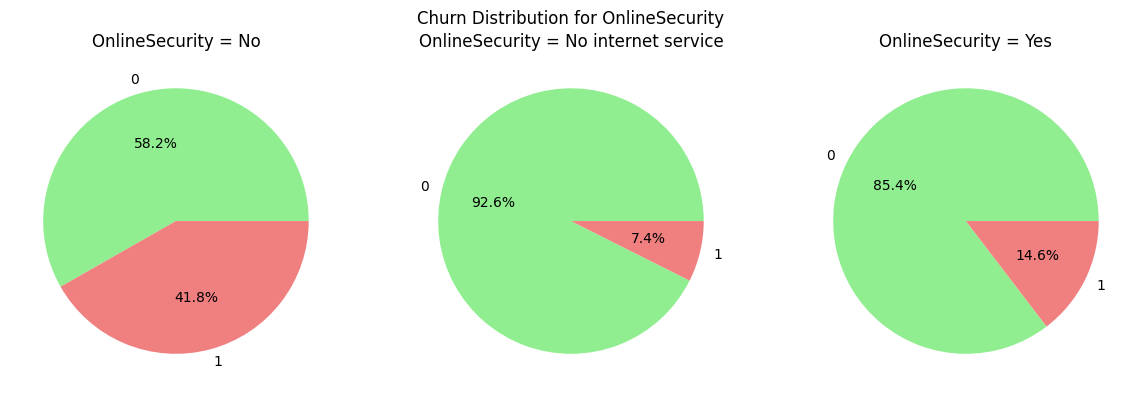

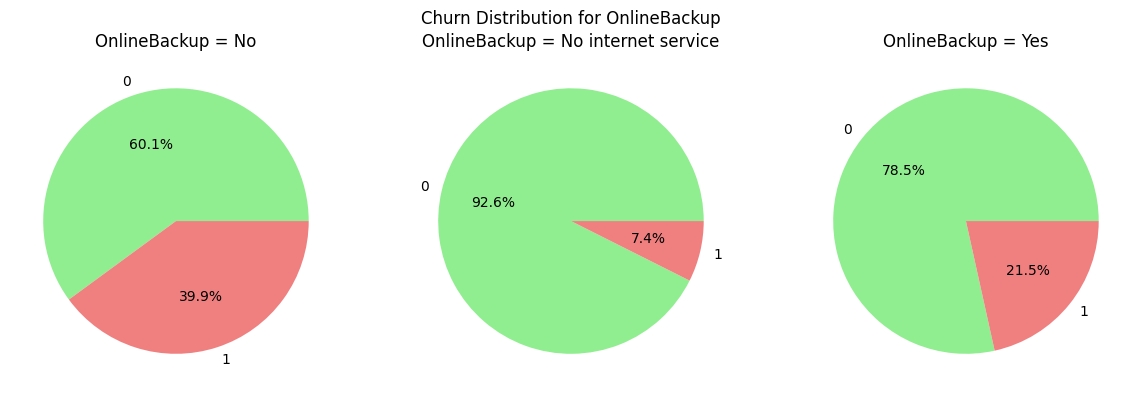

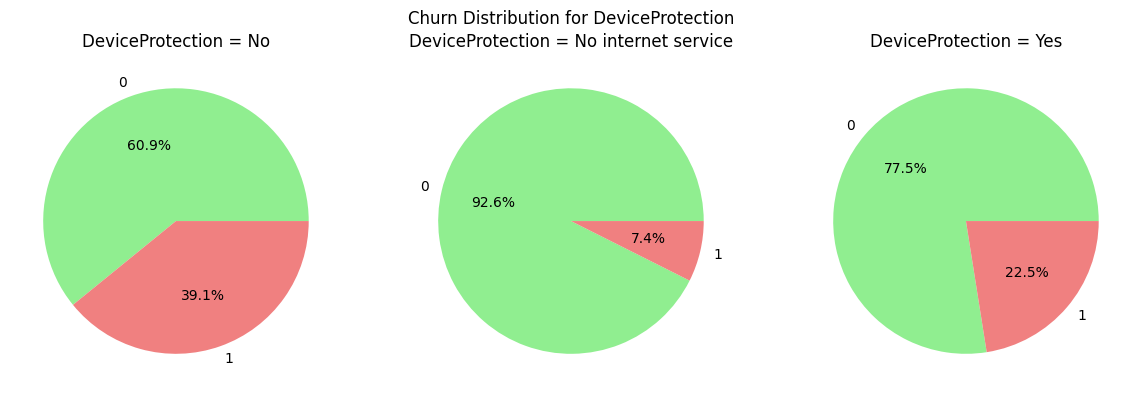

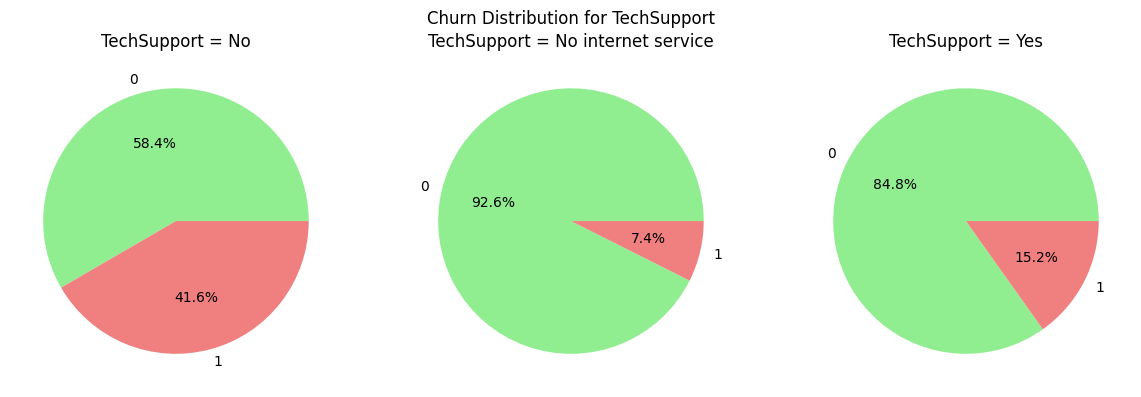

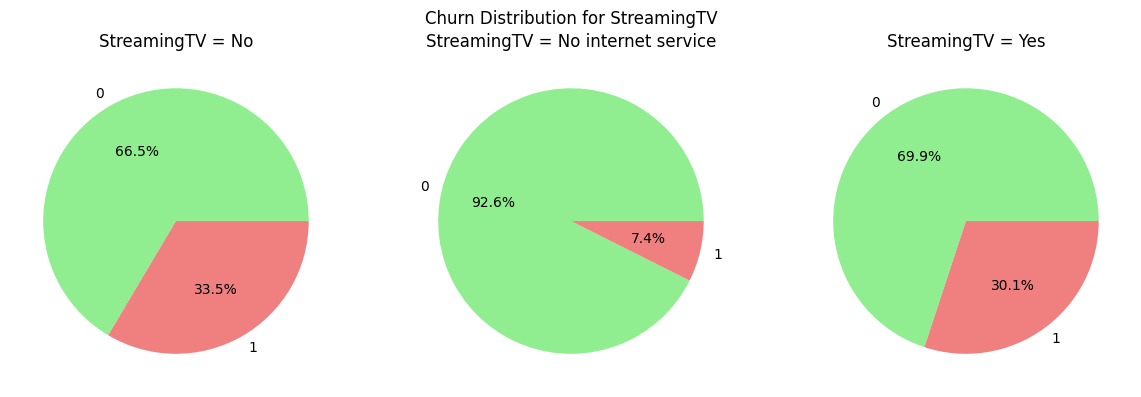

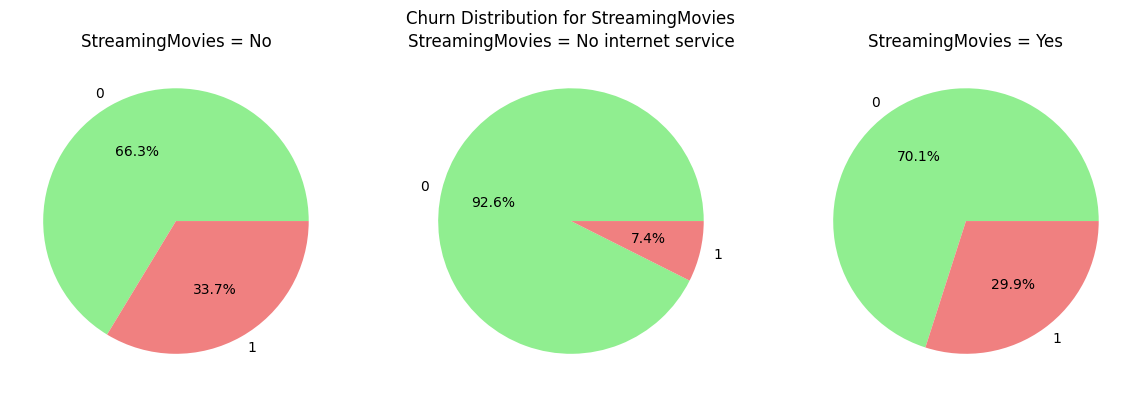

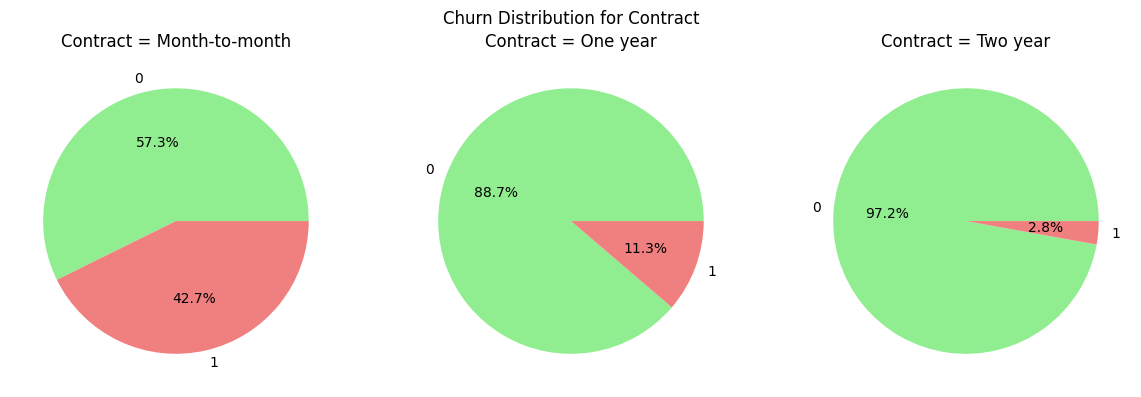

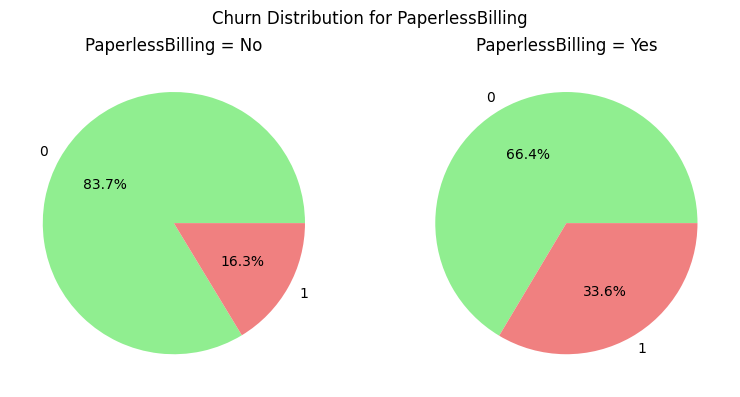

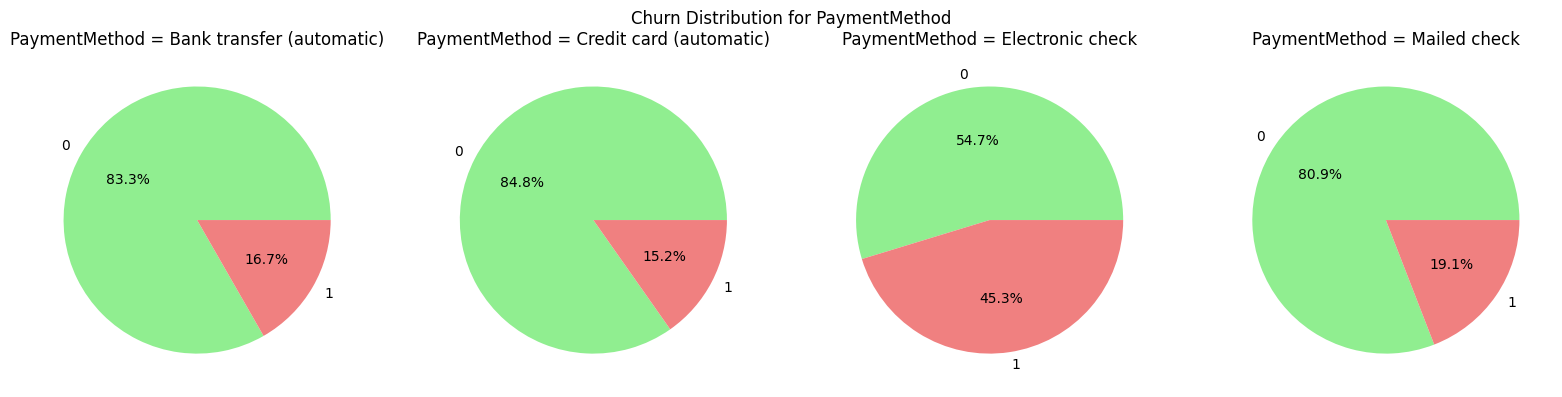

In [51]:
for col in object_columns:
        # Count churn for each category in the column
        churn_counts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)

        categories = churn_counts.index[:4]  # take only first 4 categories
        fig, axes = plt.subplots(1, len(categories), figsize=(4 * len(categories), 4))
    
        for i, category in enumerate(categories):
            labels = churn_counts.columns.tolist()
            sizes = churn_counts.loc[category].values
    
            axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
            axes[i].set_title(f'{col} = {category}')
    
        plt.suptitle(f'Churn Distribution for {col}', fontsize=12)
        plt.tight_layout()
        plt.show()

Following are the insights:
Contract: The customers with a month-to-month contract tend to churn more, possibly because of short-term engagement plans
Payment mode: Customers with electronic check as mode of payment churn more probably because of inconvenience in payment over automatic modes
Tech Support: Customers with no tech support churn more because of limited support accessibility
Customers with no device protection, online security or no backup online churn out more
Fiber optic users churn out more
customers with no dependents churn out more as compared to that with dependents churning affects less people (e.g family plan)

In [52]:
#initialize a dic to save the encoders
encoders={}
#apply label encodeing and store the encoders
for column in object_columns:
    label_encoder= LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder

In [53]:
#save the encoders to a pickle file
with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [54]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [55]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Train and test data spliting

In [56]:
#spliting features and target
x=df.drop(columns=['Churn'])
y=df['Churn']

In [57]:
print(x)
print(y)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [58]:
#split training and test data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [59]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [60]:
#there is imbalance in churn values still

Synthetic minority oversampling technique (SMOTE)

In [61]:
#smote=SMOTE(random_state=42)

In [62]:
#x_train_smote, y_train_smote=smote.fit_resample(x_train, y_train)

In [63]:
#identifies the minority and oversamples them. had it been downsampling, the values adjust according to minority
#print(y_train_smote.value_counts())

# model training

training with default hyperparameters

In [64]:
#creating a dictionary of models
models= {'Decision Tree': DecisionTreeClassifier(random_state=42), 
         'Random Forest': RandomForestClassifier(random_state=42), 
         'XGBoost': XGBClassifier(random_state=42), 
         'Logistic Regression': Pipeline([
             ('scalar', StandardScaler()),
             ('lr',LogisticRegression(max_iter=1000,random_state=42))])}

In [65]:
#dictionary to store cross validation results
cv_scores={}
#perform 5 fold cv for each model
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores=cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name]=scores
    print(f'{model_name} cross-validation accuracy: {np.mean(scores): .2f}')
    print('-'*50)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy:  0.73
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy:  0.79
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy:  0.77
--------------------------------------------------
Training Logistic Regression with default parameters
Logistic Regression cross-validation accuracy:  0.80
--------------------------------------------------


In [66]:
cv_scores

{'Decision Tree': array([0.74179237, 0.73114463, 0.72493345, 0.72670807, 0.72646536]),
 'Random Forest': array([0.8065661 , 0.80035492, 0.77018634, 0.78970719, 0.78330373]),
 'XGBoost': array([0.78704525, 0.77284827, 0.76042591, 0.77373558, 0.76642984]),
 'Logistic Regression': array([0.81543922, 0.80834073, 0.78704525, 0.78527063, 0.79751332])}

In [67]:
#random forest gave higest accuracy compared to others for default parameters

In [68]:
rfc=RandomForestClassifier(class_weight='balanced',random_state=42)


In [69]:
para_grid={
    'n_estimators':[200,300],
    'max_depth':[None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[5,10],
    'max_features':['sqrt','log2'],
    'bootstrap':[True, False]
}

In [70]:
grid_search=GridSearchCV(estimator=rfc,
                         param_grid=para_grid,
                         cv=5)
grid_search.fit(x_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Estimator:', grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=200, random_state=42)


In [249]:
# Get best model directly
best_model = grid_search.best_estimator_

# Predict
y_test_pred = best_model.predict(x_test)

# model evaluation

In [250]:
#evaluation on test data
#y_test_pred= rfc_grid.predict(x_test)

In [252]:
print('accuracy score:\n', accuracy_score(y_test, y_test_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_test_pred))
print('Classification Reporrt:\n', classification_report(y_test, y_test_pred))

accuracy score:
 0.7899219304471257
confusion matrix:
 [[836 200]
 [ 96 277]]
Classification Reporrt:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1036
           1       0.58      0.74      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409



In [277]:
print("Train Accuracy:", best_model.score(x_train, y_train))
print("Test Accuracy:", best_model.score(x_test, y_test))


Train Accuracy: 0.8592474263400781
Test Accuracy: 0.7899219304471257


In [278]:
probs = best_model.predict_proba(x_test)[:, 1]
from sklearn.metrics import f1_score, roc_auc_score
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, probs))


F1 Score: 0.6517647058823529
ROC AUC: 0.8615848230459491


In [279]:
#save the trained model as pickle file
model_data={'model': best_model, 'features_names': x.columns.tolist()}
with open('customer_churn_model.pkl','wb') as f:
    pickle.dump(model_data,f)

# load the saved model and build a predictive system

In [280]:
model_data

{'model': RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                        n_estimators=200, random_state=42),
 'features_names': ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges']}

In [270]:
#load the saved model and the feature names:
with open('customer_churn_model.pkl','rb') as f:
    model_data=pickle.load(f)

loaded_model= model_data['model']
feature_names=model_data['features_names']

In [271]:
with open('customer_churn_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

loaded_model=model_data['model']
feature_names=model_data['features_names']

In [272]:
print(loaded_model)
print(feature_names)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=200, random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [282]:
customer_data = {
    
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 34,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 56.95,
    'TotalCharges': 1889.5
}

customer_data_df=pd.DataFrame([customer_data])
with open('encoders.pkl', 'rb') as f:
    encoders=pickle.load(f)
print(customer_data_df.head())



  gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0   Male              0      No         No      34          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL            Yes           No              Yes          No   

  StreamingTV StreamingMovies  Contract PaperlessBilling PaymentMethod  \
0          No              No  One year               No  Mailed check   

   MonthlyCharges  TotalCharges  
0           56.95        1889.5  


In [283]:
#encode categorical features using the saved encoders
for column, encoder in encoders.items():
    customer_data_df[column]= encoder.transform(customer_data_df[column])

In [284]:
print(customer_data_df.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        0           0      34             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 0              3           56.95        1889.5  


In [285]:
#make a prediction
prediction=loaded_model.predict(customer_data_df)
pred_prob=loaded_model.predict_proba(customer_data_df)
print(prediction)
print(f"Prediction: {'Churn' if prediction[0]==1 else 'No Churn'}")
print(f'Prediction probability: {pred_prob}')

[0]
Prediction: No Churn
Prediction probability: [[0.93447474 0.06552526]]


In [290]:
customer_data_2 = {
    
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 2,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 53.85,
    'TotalCharges': 108.15
}

customer_data_2_df=pd.DataFrame([customer_data_2])
with open('encoders.pkl', 'rb') as f:
    encoders=pickle.load(f)
print(customer_data_2_df.head())

  gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0   Male              0      No         No       2          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL            Yes          Yes               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling PaymentMethod  \
0          No              No  Month-to-month              Yes  Mailed check   

   MonthlyCharges  TotalCharges  
0           53.85        108.15  


In [291]:
#encode categorical features using the saved encoders
for column, encoder in encoders.items():
    customer_data_2_df[column]= encoder.transform(customer_data_2_df[column])

In [292]:
print(customer_data_2_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              3           53.85        108.15  


In [293]:
#make a prediction
prediction=loaded_model.predict(customer_data_2_df)
pred_prob=loaded_model.predict_proba(customer_data_2_df)
print(prediction)
print(f"Prediction: {'Churn' if prediction[0]==1 else 'No Churn'}")
print(f'Prediction probability: {pred_prob}')

[1]
Prediction: Churn
Prediction probability: [[0.34112355 0.65887645]]
